In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sweetviz as sv

sns.set()
pd.set_option('display.max.columns', 100)
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_fotmat = 'svg'

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

df = pd.read_csv(DATA_URL + 'telecom_churn.csv')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2. Univariate Visualization

#### Univariate analysis looks at one feature at a time.

## 2.1 Quantitative features

Histogram and density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd98f02160>,
      dtype=object)

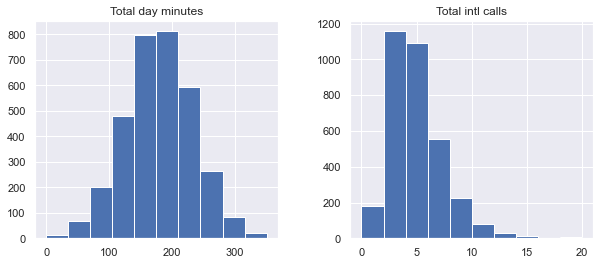

In [3]:
features = ['Total day minutes', 'Total intl calls']

df[features].hist(figsize = (10,4))

# Total day minutes is normal distribution
# total intl calls is skewed right plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6829b220>,
      dtype=object)

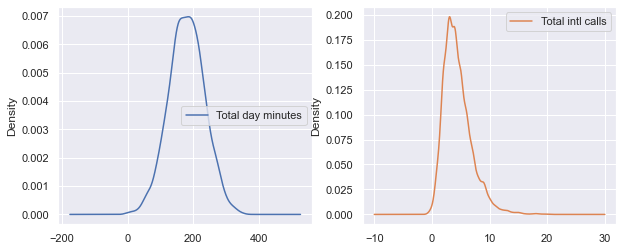

In [4]:
df[features].plot(kind = 'density', subplots = True, layout = (1,2), sharex = False, figsize = (10,4))

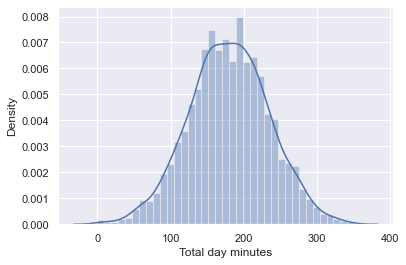

In [5]:
sns.distplot(df['Total day minutes'])

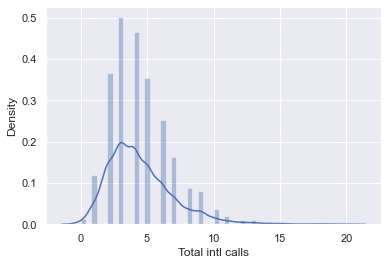

In [6]:
sns.distplot(df['Total intl calls'])

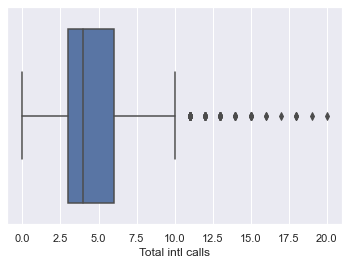

In [7]:
sns.boxplot(x = 'Total intl calls', data = df)

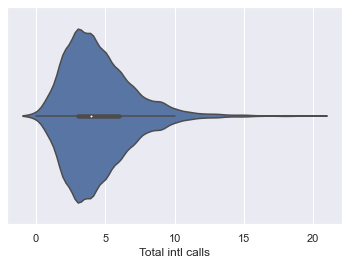

In [8]:
sns.violinplot(x = 'Total intl calls', data = df)

In [9]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


### 2.2 Categorical and binary features


In [10]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

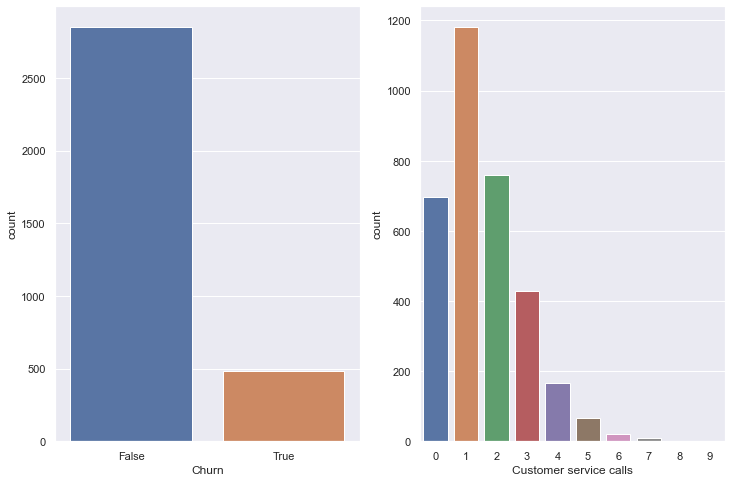

In [11]:
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(12,8))
sns.countplot(x = 'Churn', data = df, ax = axes[0])
sns.countplot(x = 'Customer service calls', data = df,ax = axes[1])

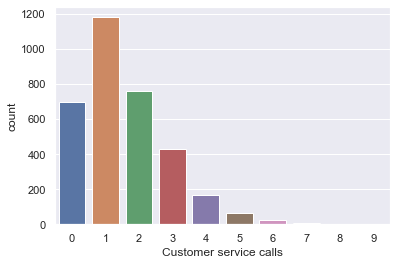

In [12]:
sns.countplot(x = df['Customer service calls'])

- Histogram is best suited for looking at distribution of **numerical variables** while barplot is best suted for **categorical variables**
- The values on the x axis in **histogram** are numerical while **bar plot** can have any type of values on x-axis: numbers, strings, booleans



# 3. Multivariate Visualization

### Quantitative vs. quantitative

Correlation Matrix

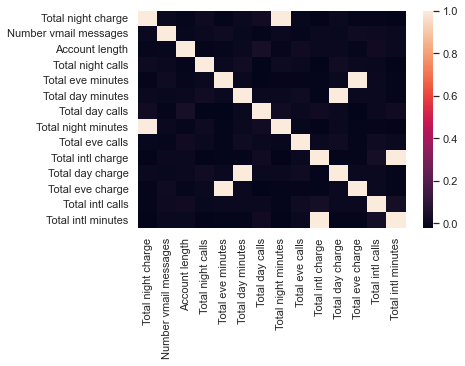

In [13]:
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

# 4 variables has correlation : 
# Total day minutes : Total day charge
# Total intl minutes : Total intl change
# Total eve charge : total eve minutes
# Total night minutes : Total night charge

In [14]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

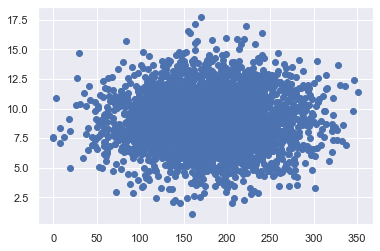

In [15]:
plt.scatter(df['Total day minutes'],df['Total night charge'])

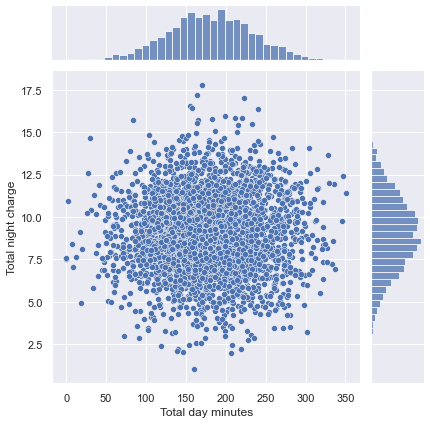

In [16]:
sns.jointplot(x = df['Total day minutes'], y = df['Total night charge'], kind = 'scatter')

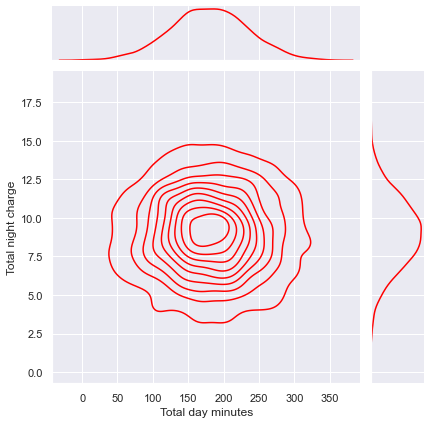

In [17]:
sns.jointplot(x = df['Total day minutes'], y = df['Total night charge'], kind = 'kde', color = 'red')

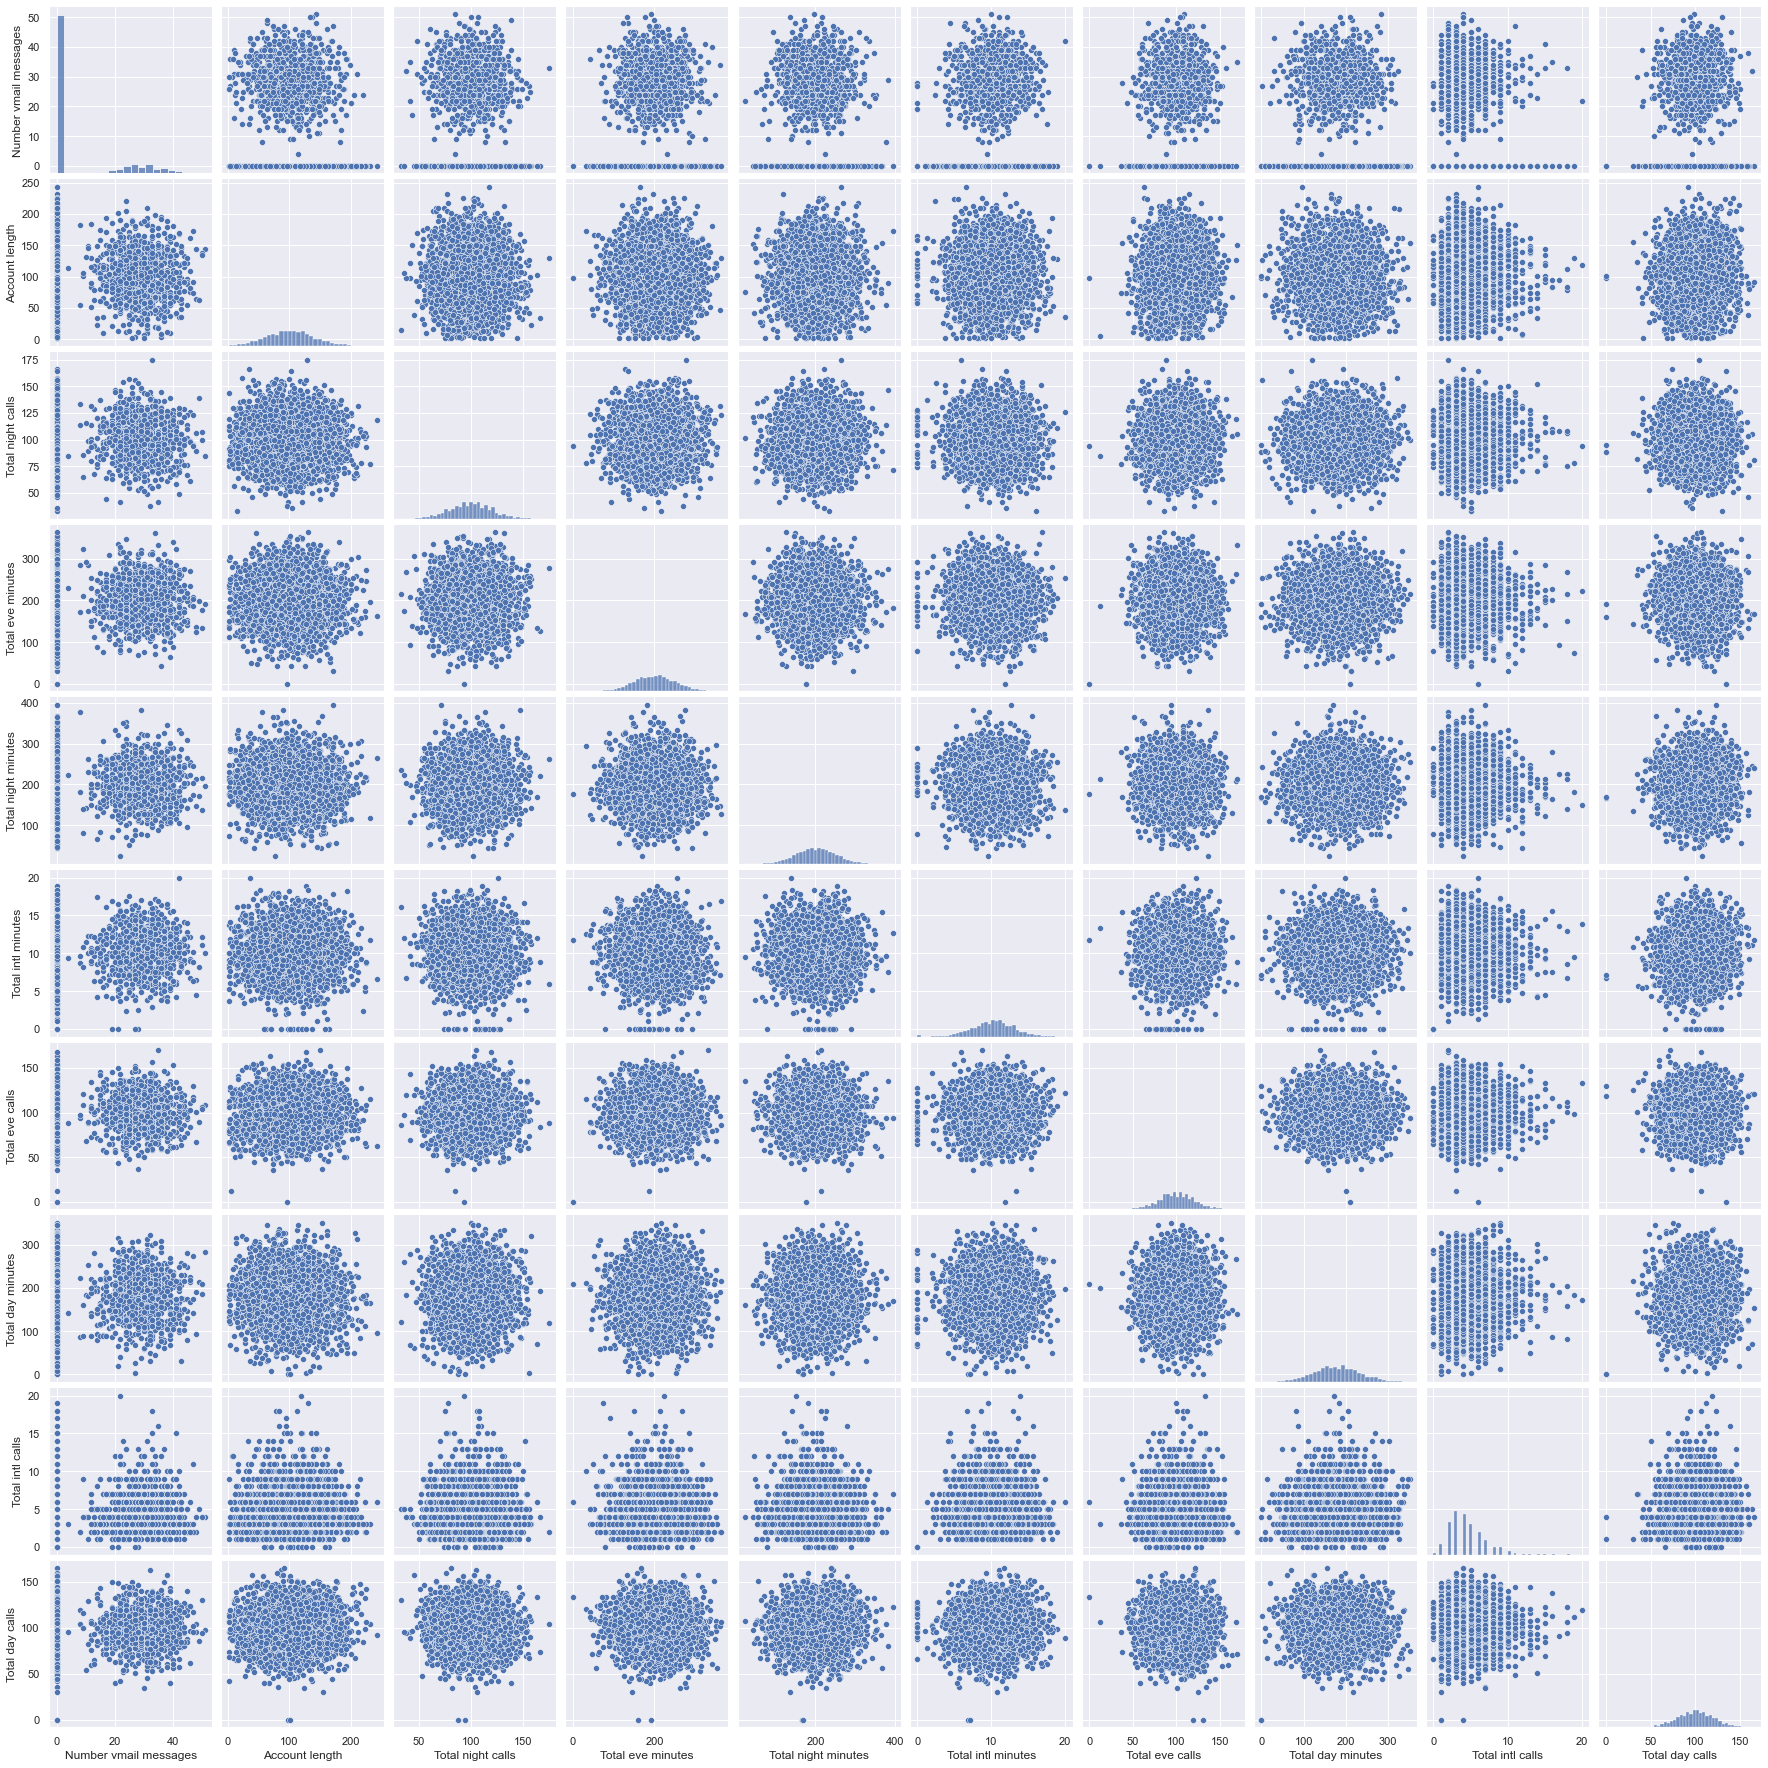

In [18]:
sns.pairplot(df[numerical])

### 3.2 Quantitative vs Categorical


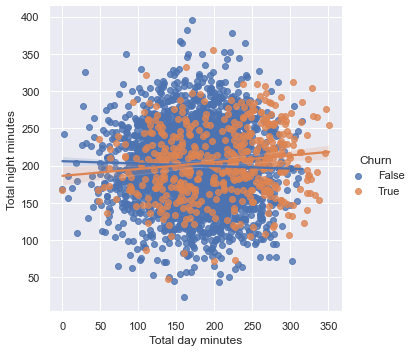

In [19]:
sns.lmplot('Total day minutes','Total night minutes', data = df, hue = 'Churn')

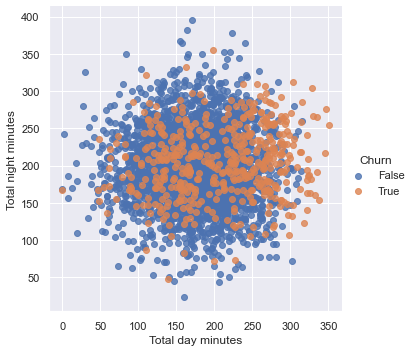

In [20]:
sns.lmplot('Total day minutes','Total night minutes', data = df, hue = 'Churn', fit_reg = False)

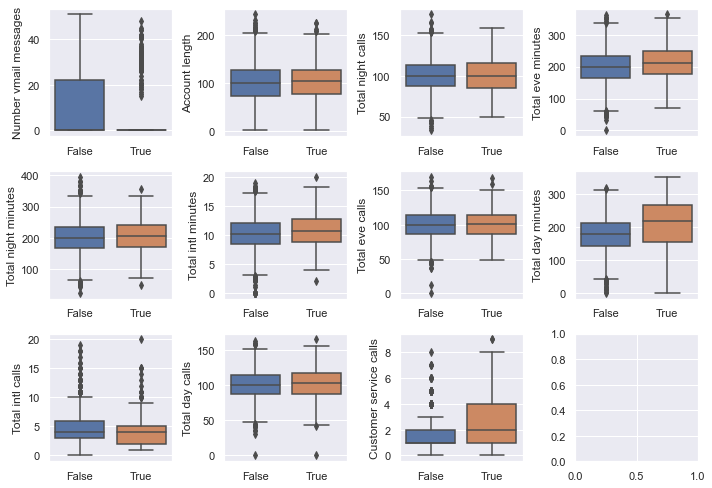

In [21]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

#### From the above the result, the greatest discrepancy in distribution between two group in 'Churn' variable are
- Total day minites
- Customer service calls
- Number vmail messages

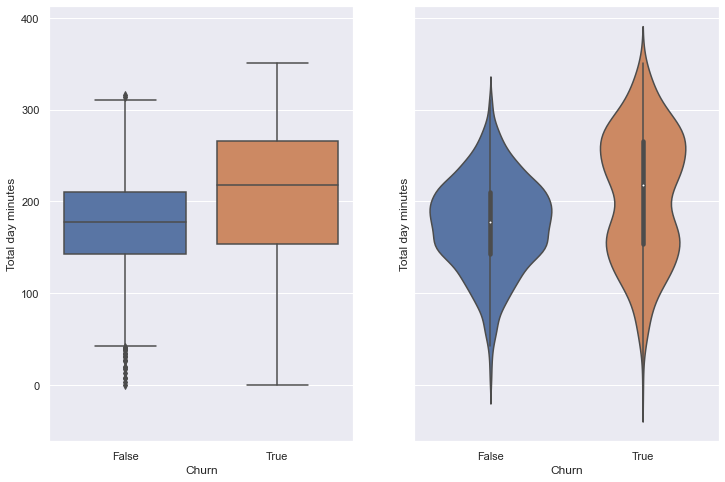

In [22]:
# Let's take a look at the distribution of day minutes for loyal and disloyal customers

_, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (12,8))

sns.boxplot(x = 'Churn', y ='Total day minutes', data = df, ax = axes[0])
sns.violinplot(x = 'Churn', y ='Total day minutes', data = df, ax = axes[1])

# Disloyal customers are talking more on the phone

#### Observation :
On average, customers (discontinue their contract) are more active users of communication services.

Perhaps Predictions : 

- customers are unhappy with their tariffs, so possible measre to prevent churn could be a reduction in call rates.
> * Company will need to undertake additional economic analysis to find out whether such measures would be beneficial

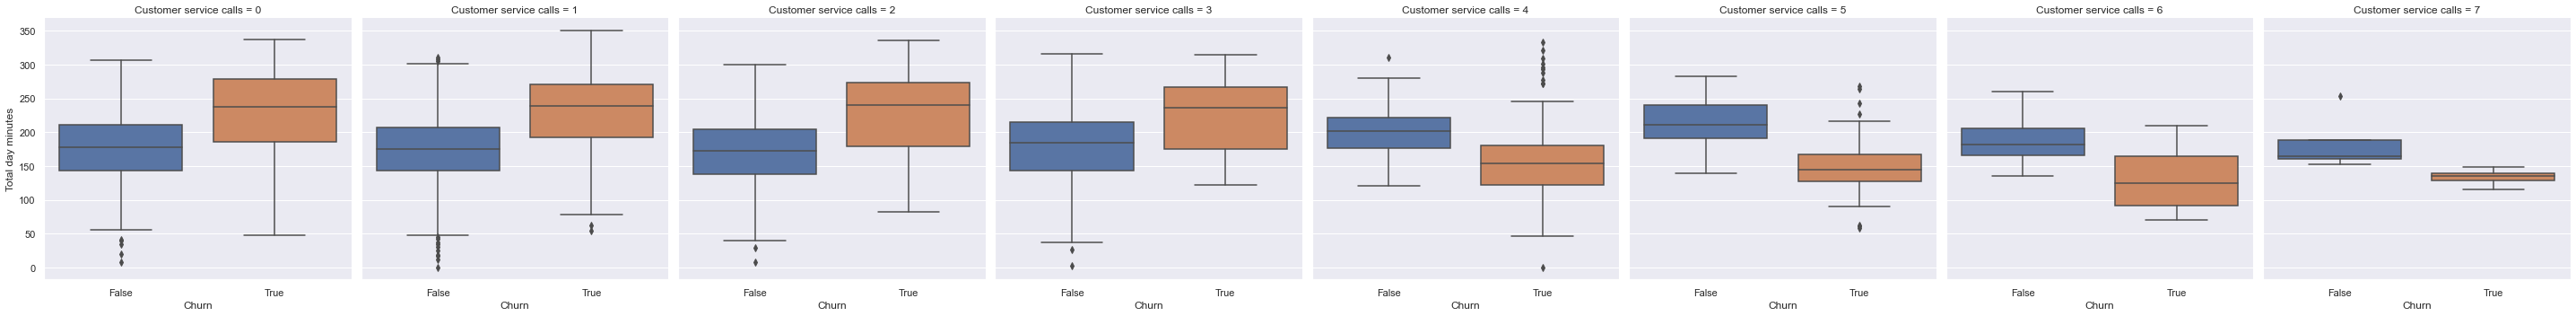

In [23]:
sns.catplot(
    x = 'Churn',
    y = 'Total day minutes',
    col = 'Customer service calls',
    data = df[df['Customer service calls'] < 8],
    kind = 'box'

)

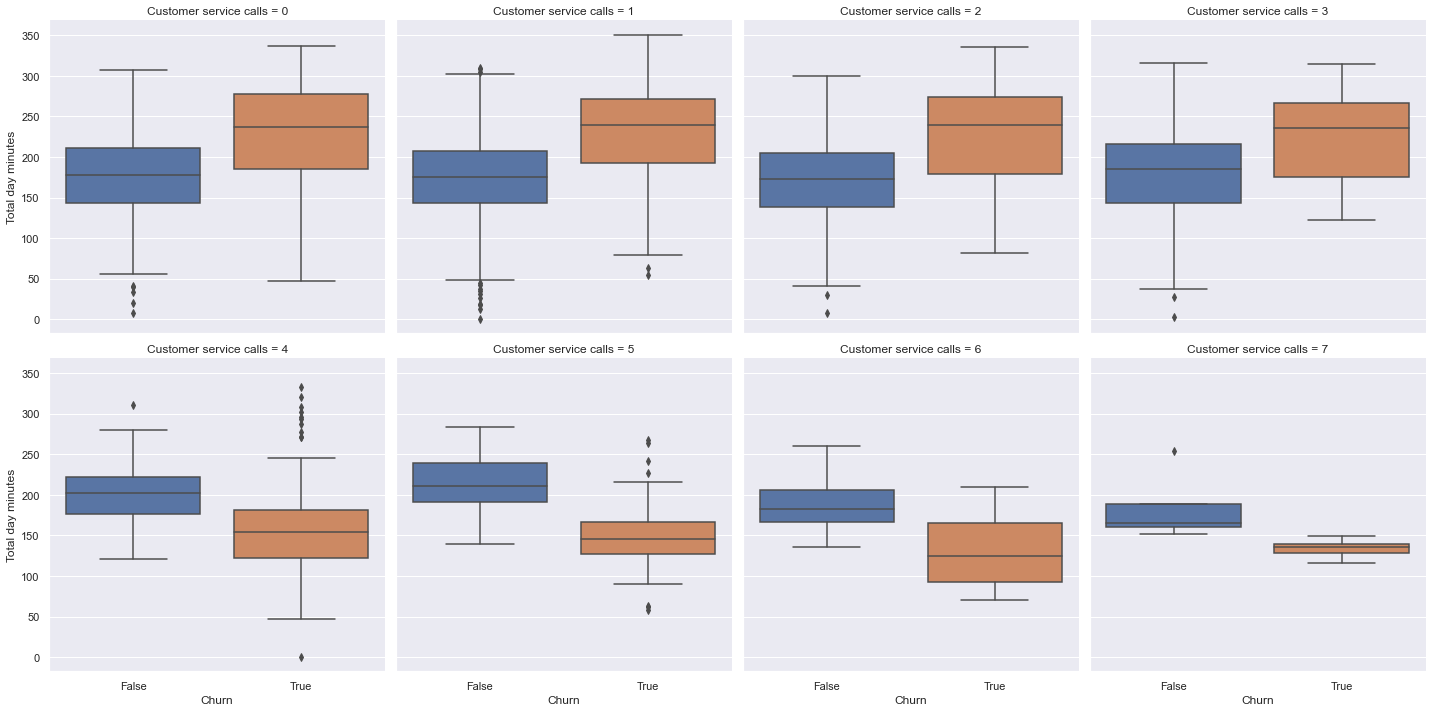

In [24]:
sns.catplot(
    x = 'Churn',
    y = 'Total day minutes',
    col = 'Customer service calls',
    data = df[df['Customer service calls'] < 8],
    kind = 'box',
    col_wrap = 4,
    height = 5
)

#### 3.4 Categorical vs.Categorical


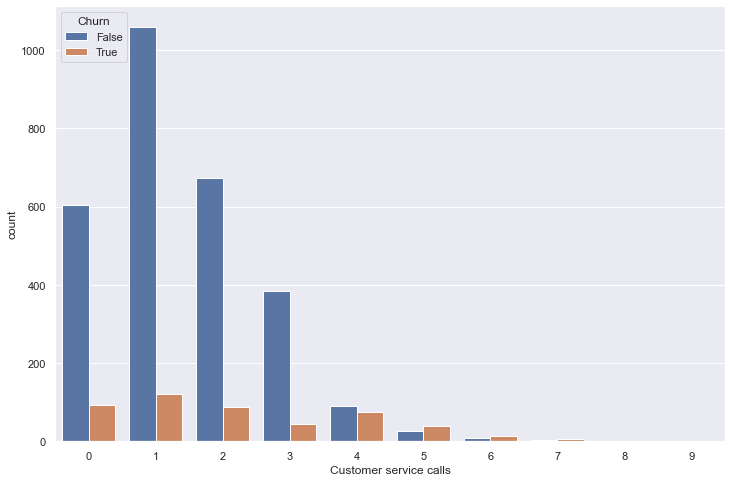

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Customer service calls', data = df, hue = 'Churn')

# The churn rate increase significally after 4 or more calls to customer service

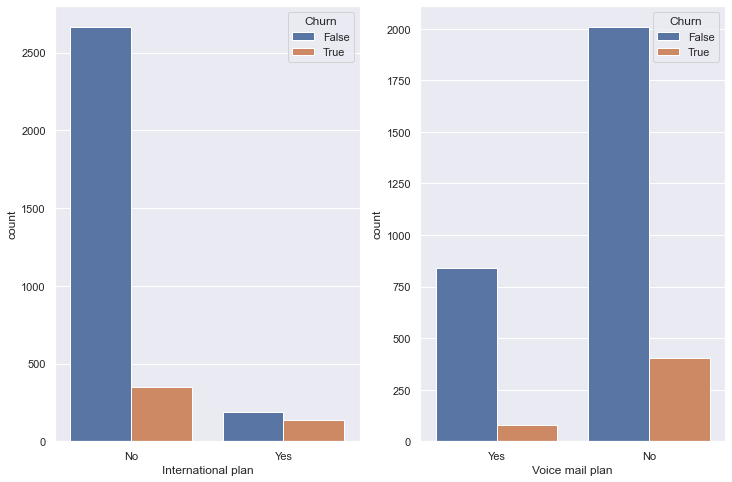

In [26]:
# Chrun vs binary features (International plan and voicemail plan)

_, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (12,8))

sns.countplot(x = 'International plan', hue = 'Churn', data = df, ax = axes[0])
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = df, ax = axes[1])

# when international plan is registered, there is higher churn rate.
# However, we did not see these observation from the Voice mail plan

In [27]:
pd.crosstab(df['State'],df['Churn'], margins = True).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68,2850
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9,483
All,52,80,55,64,34,66,74,54,61,63,54,53,44,73,58,71,70,59,51,65,70,62,73,84,63,65,68,68,62,61,56,68,62,66,83,78,61,78,45,65,60,60,53,72,72,77,73,66,78,106,77,3333


In [28]:
df.groupby(df['State'])['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending = False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT,AR,KS,NY,MN,PA,MA,CT,NC,NH,GA,DE,OK,OR,UT,CO,KY,SD,OH,FL,IN,ID,WY,MO,VT,AL,NM,ND,WV,TN,DC,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,0.205882,0.2,0.185714,0.180723,0.178571,0.177778,0.169231,0.162162,0.161765,0.160714,0.148148,0.147541,0.147541,0.141026,0.138889,0.136364,0.135593,0.133333,0.128205,0.126984,0.126761,0.123288,0.116883,0.111111,0.109589,0.1,0.096774,0.096774,0.09434,0.09434,0.092593,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [29]:
df.groupby(df['State'])['Churn'].apply(np.mean).sort_values(ascending = False)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: Churn, dtype: float64

# 4. Whole Dataset Visualization

#### 4.1 A naive approach

We have been looking at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.

<https://mlcourse.ai/book/topic02/topic02_visual_data_analysis.html>

#### 4.2 Dimensionality Reduction

Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.


#### 4.3 t-SNE
Basic Idea : find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane.

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [31]:
# leave out the state and churn features 
# convert values yes and no into 1 and 0
X = df.drop(['Churn','State'], axis = 1)
X['International plan'] = X['International plan'].map({'Yes':1, 'No' : 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes' : 1, 'No' : 0})


In [32]:
# normalized the data
# subtract the mean for each variable and divided it by standard deviation

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# t-SNE

tsne = TSNE(random_state = 17)
tsne_repr = tsne.fit_transform(X_scaled)


In [34]:
tsne_repr

array([[  9.715601 , -61.124607 ],
       [ 37.550423 , -65.09309  ],
       [-10.383023 ,  44.289795 ],
       ...,
       [ 32.93983  ,   2.2348654],
       [-15.440466 , -29.387072 ],
       [ 10.1491585, -56.23608  ]], dtype=float32)

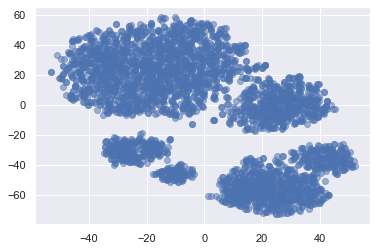

In [36]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1], alpha = 0.5)

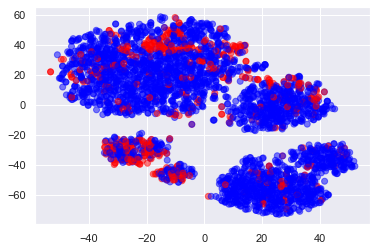

In [38]:
plt.scatter(
tsne_repr[:,0],
tsne_repr[:,1],
c = df['Churn'].map({False : 'Blue', True : 'Red'}),
alpha = 0.5
)

# Can see that customers who churned are concentrated in a few areas of the lower dimensional feature space

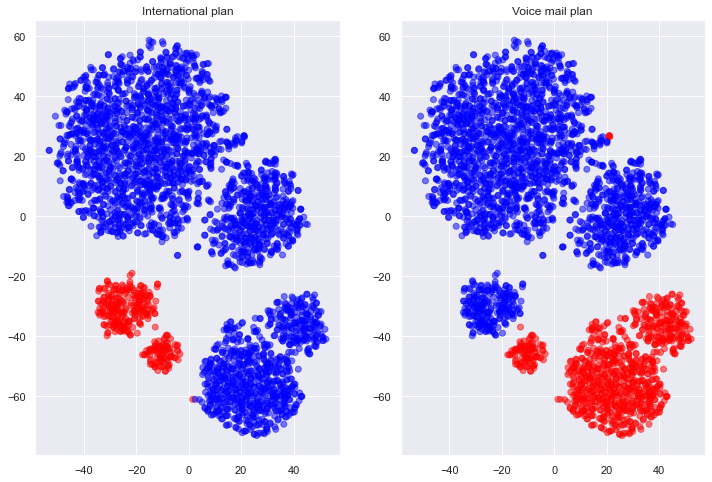

In [40]:
# Better visualization

_,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
for i, name in enumerate(['International plan','Voice mail plan']):
    axes[i].scatter(
        tsne_repr[:,0],
        tsne_repr[:,1],
        c=df[name].map({'Yes': 'Red','No': 'Blue'}),
        alpha = 0.5
    )
    axes[i].set_title(name)